
* Traditional NLP (text representation like BoW & TF-TDF, preprocessing and ML model)
* Sequence model (preprocessing and sequence model)*italicized text*


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
train_df = pd.read_csv("twitter_training.csv")
test_df = pd.read_csv("twitter_test.csv")

## EDA

In [167]:
train_df.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
37486,5227,Hearthstone,Neutral,to
67785,3609,Cyberpunk2077,Positive,@sk_komianos is in cdpr we will trust
59296,3363,Facebook,Irrelevant,individuals with a Brown-Trump conspiracy theo...
24673,4637,Google,Negative,@ Google. My Facebook account has been hacked....
59123,3335,Facebook,Irrelevant,The


In [168]:
test_df.sample(5)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
648,10391,PlayerUnknownsBattlegrounds(PUBG),Positive,3 years ago this week. 😭\n\nSuch a good time f...
267,7019,johnson&johnson,Negative,"LMAO...this country is fvcked up. JFC, just sa..."
867,2249,CallOfDuty,Irrelevant,"Oh dear, I'm pleased I'm over 18 😂\n#xbox #cod..."
535,5003,GrandTheftAuto(GTA),Negative,This COD gon take long as hell to download 🤦🏽‍...
497,2008,CallOfDuty,Irrelevant,It was ab fab seeing the 6 bungalows built in ...


In [169]:
train_df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [170]:
test_df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

* Assign Names for eachdataframe

In [171]:
train_df.columns = ["id", "company", "target", "text"]
test_df.columns = ["id", "company", "target", "text"]


In [172]:
train_df

,id,company,target,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [173]:
test_df.sample(5)

,id,company,target,text
566,8990,Nvidia,Neutral,Increased Performance Requires the Right Data\...
404,6992,johnson&johnson,Positive,"By combining product #engagement #analytics, #..."
91,3929,Cyberpunk2077,Positive,This looks kinda clean!
830,12790,WorldOfCraft,Neutral,World Of Warcraft: Classic Continues To Suffer...
21,2286,CallOfDuty,Irrelevant,Call of duty warzone (livestream) w/ subs #War...


In [174]:
train_df.drop("id", inplace=True, axis=1)
test_df.drop("id", inplace=True, axis=1)

In [175]:
print(train_df.shape)
print(test_df.shape)

(74681, 3)
(999, 3)


In [176]:
print(f"Null_values: \n{train_df.isnull().sum()}")
print("##############################")
print(f"Null_values: \n{test_df.isnull().sum()}")


Null_values: 
company      0
target       0
text       686
dtype: int64
##############################
Null_values: 
company    0
target     0
text       0
dtype: int64


In [177]:
train_df.dropna(inplace=True)

In [178]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

3038
0


In [179]:
train_df.drop_duplicates(inplace=True)

In [180]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(train_df, test_size=0.1, random_state=42)
print(f"Train DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {validation_df.shape}")

Train DataFrame shape: (63861, 3)
Validation DataFrame shape: (7096, 3)


In [181]:
# validation_df.to_csv("validation_df.csv", index=False)
# train_df.to_csv("train_df.csv", index=False)

In [182]:
train_df.describe()

,company,target,text
count,63861,63861,63861
unique,32,4,62550
top,Facebook,Negative,It is not the first time that the EU Commissio...
freq,2083,19433,73


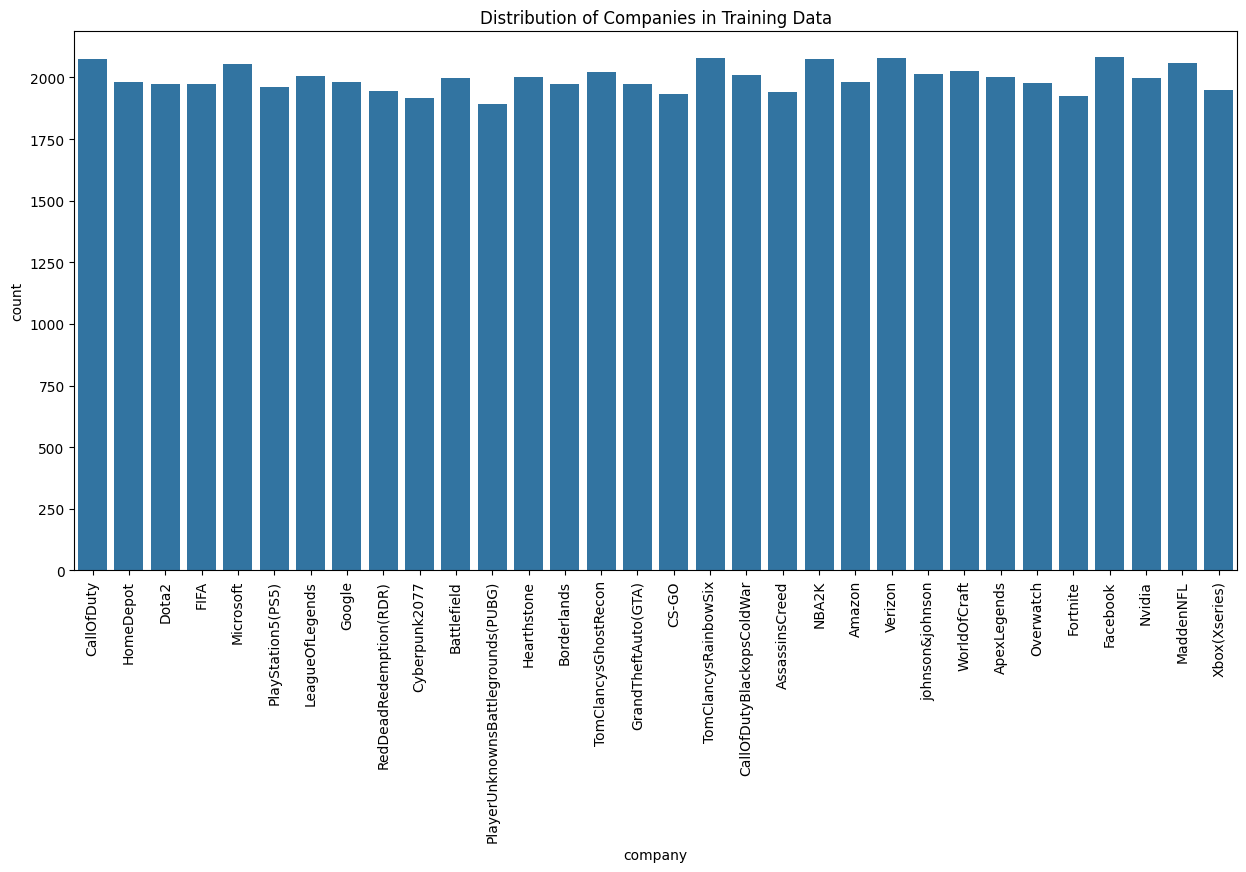

In [183]:
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='company')
plt.xticks(rotation=90)
plt.title('Distribution of Companies in Training Data')
plt.show()

In [184]:
train_df["company"].value_counts()

,count
company,
Facebook,2083
TomClancysRainbowSix,2079
Verizon,2078
NBA2K,2076
CallOfDuty,2074
MaddenNFL,2057
Microsoft,2055
WorldOfCraft,2025
TomClancysGhostRecon,2022


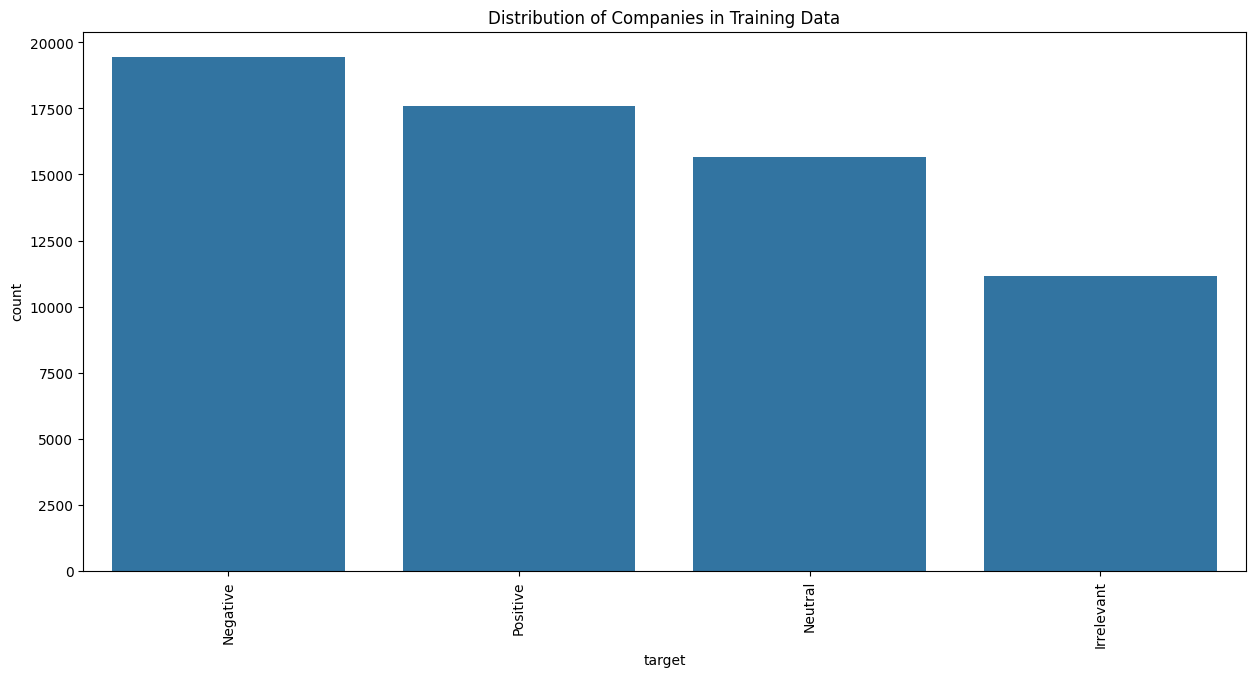

In [185]:
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='target')
plt.xticks(rotation=90)
plt.title('Distribution of Companies in Training Data')
plt.show()

In [186]:
train_df["target"].value_counts()

,count
target,
Negative,19433
Positive,17597
Neutral,15661
Irrelevant,11170


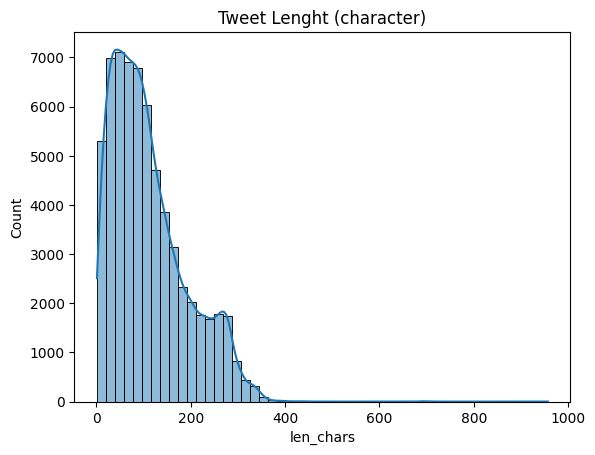

In [187]:
train_df["len_chars"] = train_df["text"].str.len()
sns.histplot(data=train_df, x="len_chars",kde=True, bins=50)
plt.title("Tweet Lenght (character)")
plt.show()


In [188]:
print("mean of len_chars", int(train_df["len_chars"].mean()))

mean of len_chars 110


### Traditional NLP (text representation like BoW & TF-TDF, preprocessing and ML model)


In [189]:
train_df["text"].sample(5).tolist()


['4 If you speed past this everyone is going by home depot just forgetting to make go 55 down the highway you ’ re one of the people I wanna choke tf out',
 "Guys, I'm here to tell you the RUMOUR of Grand Thief Auto VI being released incompletely. I am totally against that because if they want to release an incomplete version, they have the beta. ",
 'So I accidentally washed my mobile iphone7 in the wash drying machine. WHAT ME IS THIS BS AND FALSE B ADVERTISING YOU OF " WATERPROOF UP TO 3 FEET "? @Verizon Please come and measure my wash machine because it cannot fit a small lost child in it there. Also send it me a new iphone. Iphone 11s accepted, thanks.',
 'i swear mfs just starting talking out they ass bro, wtf does this mean',
 '@Rainbow6Game My leaning is slow like it stops once in a lifetime please help']

* Preprocessing

In [190]:
import nltk
# nltk.download("punkt_tab")
# nltk.download("stopwords")

In [191]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [192]:
# pip install emoji


In [193]:
import re
import emoji

In [194]:
def clean_tweet(text, demojize=True, hashtag_handling='remove_symbol', remove_short_tokens=True):
    """
    Cleans a tweet by removing URLs, mentions, hashtags, emojis, numbers,
    special characters, short tokens, extra whitespace, and ellipsis patterns.
    """

    # emojis -> text
    if demojize:
        text = emoji.demojize(text)

    # remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)

    # remove mentions
    text = re.sub(r"@\w+", "", text)

    # hashtags
    if hashtag_handling == 'remove_all':
        text = re.sub(r"#\w+", "", text)
    elif hashtag_handling == 'remove_symbol':
        text = re.sub(r"#(\w+)", r"\1", text)

    # remove ellipsis "..."
    text = re.sub(r"\.{2,}", " ", text)

    # remove ^^
    text = re.sub(r"\^\^", "", text)

    # remove w/
    text = re.sub(r"w/", "", text)

    # remove numbers
    text = re.sub(r"\d+", "", text)

    # remove special characters (keep only letters + space)
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # normalize elongated words (coooool -> coool)
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)

    # remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # remove very short tokens (like "u", "n", "r")
    if remove_short_tokens:
        tokens = text.split()
        tokens = [t for t in tokens if len(t) > 2]  # keeps tokens >= 3 letters
        text = " ".join(tokens)

    return text


In [195]:
tweet1 = "Check out this great library! 😊 https://pypi.org/project/emoji #Python #NLP @user123 and this is an example with ellipsis...."
print("Original Tweet: ===>",tweet1)
cleaned_tweet1 = clean_tweet(tweet1)
print("Without # Signs : ===>",cleaned_tweet1)
cleaned_tweet2 = clean_tweet(tweet1, hashtag_handling="remove_all")
print("Without # Signs&Words: ===>",cleaned_tweet2)

Original Tweet: ===> Check out this great library! 😊 https://pypi.org/project/emoji #Python #NLP @user123 and this is an example with ellipsis....
Without # Signs : ===> Check out this great library smilingfacewithsmilingeyes Python NLP and this example with ellipsis
Without # Signs&Words: ===> Check out this great library smilingfacewithsmilingeyes and this example with ellipsis


In [196]:
examples = train_df["text"].sample(3).tolist() # Select random tweets and make on them cleaning

for example in examples:
  print("ORGIN:", example)
  print("ClEAN:", clean_tweet(example))
  print("==============================")

ORGIN:  . monkeyviral.com/trolling-of-no…
ClEAN: monkeyviralcomtrollingofno
ORGIN: at
ClEAN: 
ORGIN: smurfs saying csgo can go fuck themselves
ClEAN: smurfs saying csgo can fuck themselves


In [197]:
from nltk.tokenize import word_tokenize
import string

In [198]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))

In [199]:
def tokenize_nltk(text):
  tokens = word_tokenize(text.lower())
  return [t for t in tokens if t not in stopwords_list and t not in string.punctuation]


# Calculate raw vocabulary size using NLTK (before cleaning)
raw_vocab_nltk = set(tokenize_nltk(" ".join(train_df["text"])))

In [200]:
len(raw_vocab_nltk)

39825

In [201]:
# Apply cleaning and then tokenize with NLTK
cleaned_sample_text_nltk = train_df["text"].map(clean_tweet)
clean_vocab_nltk = set(tokenize_nltk(" ".join(cleaned_sample_text_nltk)))


In [202]:
len(clean_vocab_nltk)

35220

In [203]:
def preprocess_tokens(text, remove_stopwords=True, replace_numbers=True):
  """
  1. we remove any link and mention and hashtag
  2. we convert text to lowercase
  3. we can replace numbers by
  4. we tokenize and remove punctuation
  5. we remove stop words
  """
  text = clean_tweet(text) # remove any patterns using regex
  text = text.lower() # casefolding
  if replace_numbers:
    # text = re.sub(r"\b\d+\b", "  ", text)
    text = re.sub(r"\b\d+\b", "", text)


  tokens = [t for t in word_tokenize(text) if t not in string.punctuation]
  if remove_stopwords:
    tokens = [t for t in tokens if t not in stopwords_list]
  # text = " ".join(tokens)
  return tokens

In [204]:
# Apply the preprocess_tokens function to each tweet in the sampled Series
processed_tweets = train_df["text"].apply(preprocess_tokens)

# Print the processed tweets without stopwords without hyperlinks or Hashtags without numbers
for tweet_tokens in processed_tweets:
  print(tweet_tokens)


Streaming output truncated to the last 5000 lines.
['facebook', 'jail', 'literally', 'nothin', 'aint', 'even', 'tell', 'got', 'fired']
['stop', 'jumping', 'stupid', 'overwatch', 'boy']
['greed', 'yes', 'small', 'businesses', 'need', 'economy', 'stay', 'business', 'unlikely', 'greed', 'matter', 'survival', 'either', 'case', 'see', 'giant', 'monsters', 'read', 'amazon', 'microsoft', 'remaining', 'players', 'market']
['cant', 'wait']
['afvision', 'problems', 'sound', 'coming', 'callup', 'serve', 'modern', 'warfare', 'sure', 'fix', 'get', 'sound', 'sounds', 'like', 'comes', 'tin']
['bro', 'fuck', 'bots', 'fortnite', 'game', 'shit']
[]
['oops', 'got', 'caught', 'making', 'people', 'think', 'full', 'game', 'shame']
['hearthstone', 'made', 'vore', 'card', 'pictwittercomgcuyalohm']
['numerous', 'nvidia', 'closing', 'ebay', 'less', 'day']
[]
['thats', 'megasaurs', 'went', 'crushed']
['unkcomtrollingofno']
['cant', 'wait', 'someone', 'come', 'across', 'player', 'labeled', 'jamefles']
['covid', '

In [205]:
import spacy

In [206]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [207]:
def pos_counts(text):
  doc = nlp(clean_tweet(text))
  noun = sum(1 for tok in doc if tok.pos_ == "NOUN")
  verb = sum(1 for tok in doc if tok.pos_ == "VERB")
  adj = sum(1 for tok in doc if tok.pos_ == "ADJ")
  return noun, verb, adj

train_df[["noun_count", "verb_count", "adj_count"]] = train_df["text"].apply(lambda t: pd.Series(pos_counts(t)))

In [208]:
train_df.sample(5)

,company,target,text,len_chars,noun_count,verb_count,adj_count
71703,TomClancysGhostRecon,Neutral,T3 + a random nice tough guy still going stron...,50,1,1,4
73031,Nvidia,Irrelevant,"Thanks @TheNextPlatform, @TDaytonPM, @NicoleHe...",80,2,0,1
36849,Microsoft,Negative,Zero day date on IE! Time Exploited. Apply mit...,251,7,4,2
26408,AssassinsCreed,Positive,I Fe in love with this character after playing...,76,4,1,0
52912,RedDeadRedemption(RDR),Neutral,. LIVE AND,10,0,1,0


In [209]:
def lemmatize_text(text):
  # Ensure input to nlp is a string
  processed_text = " ".join(preprocess_tokens(text))
  doc = nlp(processed_text)
  lemmas = [tok.lemma_ for tok in doc if not tok.is_punct and not tok.is_space]
  return " ".join(lemmas)

In [210]:
train_df["lemma_text"] = train_df["text"].map(lemmatize_text)


In [211]:
from wordcloud import WordCloud

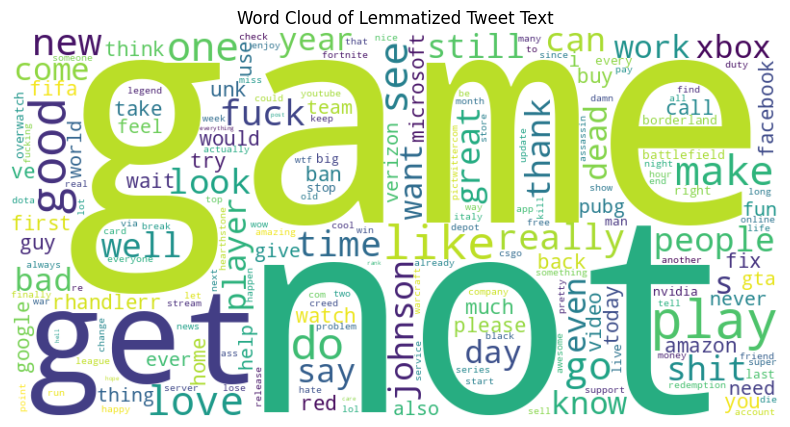

In [212]:
# Combine all the lemmatized text data into a single string
all_lemma_text = " ".join(train_df["lemma_text"])

# Tokenize and count word frequencies (basic tokenization, can be improved)
# Remove non-alphabetic characters and convert to lowercase
words = re.findall(r'\b\w+\b', all_lemma_text.lower())
word_counts = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Lemmatized Tweet Text")
plt.show()

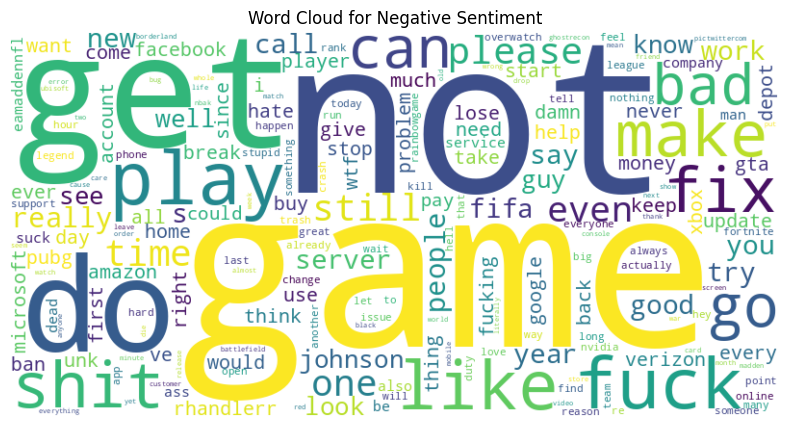

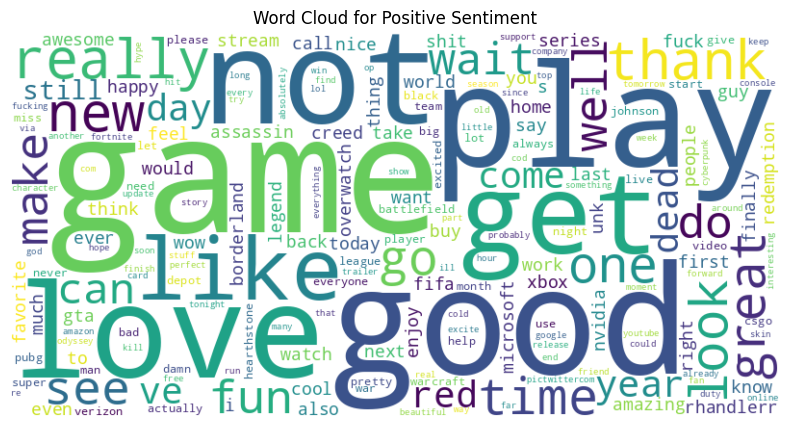

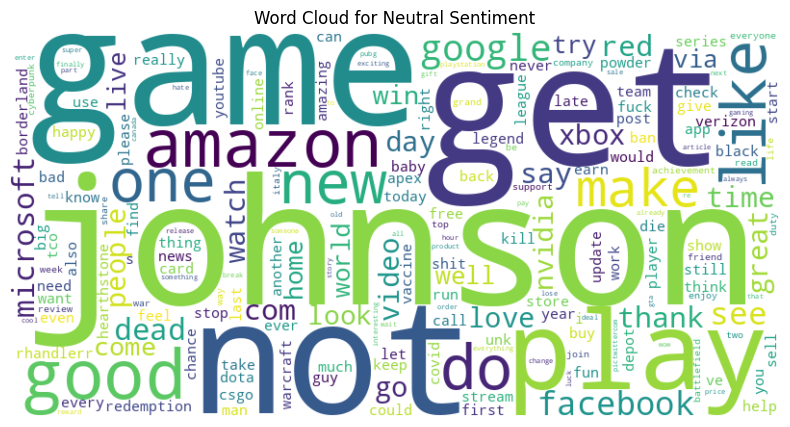

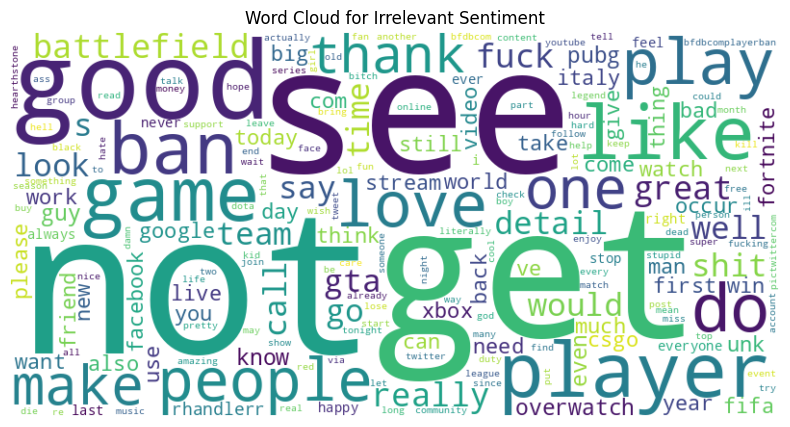

In [213]:
# Get unique target labels
target_labels = train_df['target'].unique()

for label in target_labels:
    # Filter DataFrame for the current label
    label_df = train_df[train_df['target'] == label]

    # Combine all the lemmatized text data for the current label into a single string
    all_lemma_text_label = " ".join(label_df["lemma_text"])

    # Tokenize and count word frequencies (basic tokenization, can be improved)
    # Remove non-alphabetic characters and convert to lowercase
    words_label = re.findall(r'\b\w+\b', all_lemma_text_label.lower())
    word_counts_label = Counter(words_label)

    # Generate the word cloud
    wordcloud_label = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_label)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_label, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {label} Sentiment")
    plt.show()

In [214]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [215]:
tfidf = TfidfVectorizer()

# X_bow = bow.fit_transform(train_df["lemma_text"])
X_tfidf = tfidf.fit_transform(train_df["lemma_text"])

# print("BOW Vocab Size", len(bow.vocabulary_))
print("TFIDF shape:", X_tfidf.shape)

TFIDF shape: (63861, 31468)


In [216]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [217]:
train_df.columns

Index(['company', 'target', 'text', 'len_chars', 'noun_count', 'verb_count',
       'adj_count', 'lemma_text'],
      dtype='object')

In [218]:
X = train_df[['text','noun_count','verb_count','adj_count']].copy()
y = train_df['target']

In [219]:
# ColumnTransformer: text -> TFIDF ; numeric -> scaler passthrough
col_trans_tfidf = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=10000, preprocessor=clean_tweet), 'text'),
    ('num', StandardScaler(), ['noun_count','verb_count','adj_count'])
])

In [220]:
from sklearn.svm import LinearSVC

In [221]:
from sklearn.metrics import accuracy_score, f1_score

# Define three pipelines
pipe_lr_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', LogisticRegression(max_iter=2000))])
pipe_svc_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', LinearSVC(max_iter=2000))])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Fit and evaluate
for name, pipe in [('Logistic_TFIDF', pipe_lr_tfidf), ('LinearSVC_TFIDF', pipe_svc_tfidf)]: # Added Word2Vec pipeline
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(name, "acc:", accuracy_score(y_test, preds), "f1:", f1_score(y_test, preds, average="weighted"))

Logistic_TFIDF acc: 0.7140843967744461 f1: 0.7110148474676251
LinearSVC_TFIDF acc: 0.7653644406169263 f1: 0.7640173334163344


In [222]:
from sklearn.ensemble import RandomForestClassifier


In [228]:
pipe_random_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', RandomForestClassifier(max_depth=2000))])

In [229]:
    pipe_random_tfidf.fit(X_train, y_train)
    preds = pipe_random_tfidf.predict(X_test)
    print(name, "acc:", accuracy_score(y_test, preds), "f1:", f1_score(y_test, preds, average="weighted"))

LinearSVC_TFIDF acc: 0.8599389336882487 f1: 0.8592444030793269
